# **Modul 2: Data Analysis**
# Data Visualization with Python

## **Jangan di-run! Save sebagai file baru dan edit file tersebut untuk menjawab pertanyaan**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# scroll horizontal
pd.set_option('display.max_columns', 100)

# read exel
df = pd.read_csv(r'D:\0. JCDS\Dataset\melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# **No.1**
Tampilkan visualisasi yang menggambarkan persebaran harga rumah secara keseluruhan!

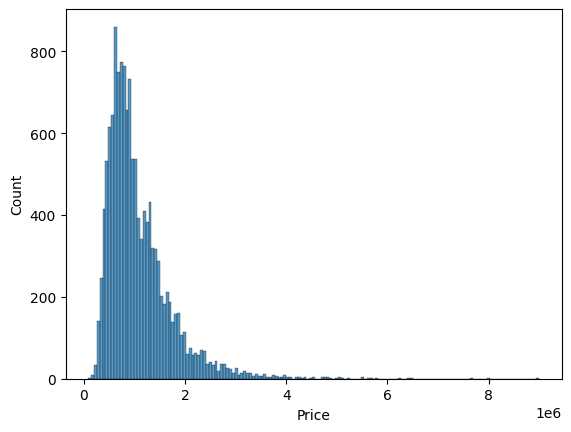

In [4]:
sns.histplot(data=df,
             x="Price")
plt.show()

# **No.2**

Tampilkan visualisasi yang menggambarkan rata-rata harga rumah berdasarkan Region Name!

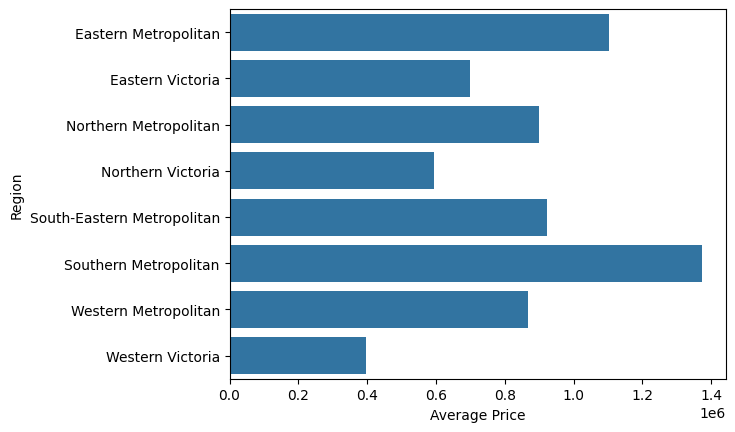

In [14]:
region_price_avg = df.groupby('Regionname')[['Price']].mean()
sns.barplot(data=region_price_avg,
            x='Price',
            y='Regionname')

plt.xlabel("Average Price")
plt.ylabel("Region")
plt.show()


# **No.3**

Tampilkan visualisasi yang menggambarkan jumlah rumah untuk tiap tipe rumah (Type)!

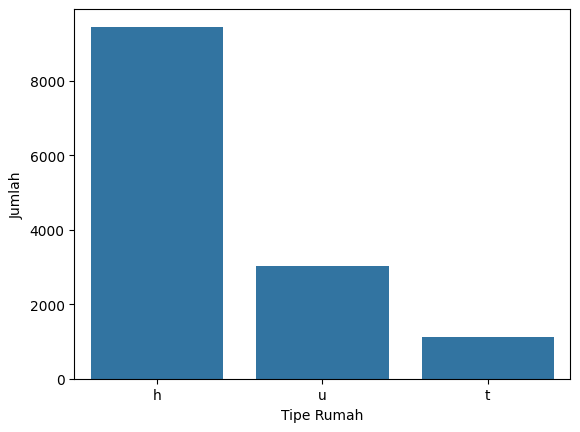

In [23]:
sns.countplot(data=df,
            x='Type')
plt.xlabel("Tipe Rumah")
plt.ylabel("Jumlah")
plt.show()


# **No.4**

- Tampilkan visualisasi yang menunjukkan nilai korelasi antara variabel `Rooms`, `Price`, `Distance`, `BuildingArea`, `YearBuilt`:

    - Scatter plot masing-masing kombinasi

    - Heatmap semua korelasi


 - Variabel apa yang memiliki korelasi paling kuat dengan harga rumah (`Price`)? Tampilkan bar plot masing-masing variabel diurutkan berdasarkan absolut dari nilai korelasi-nya terhadap `Price`.

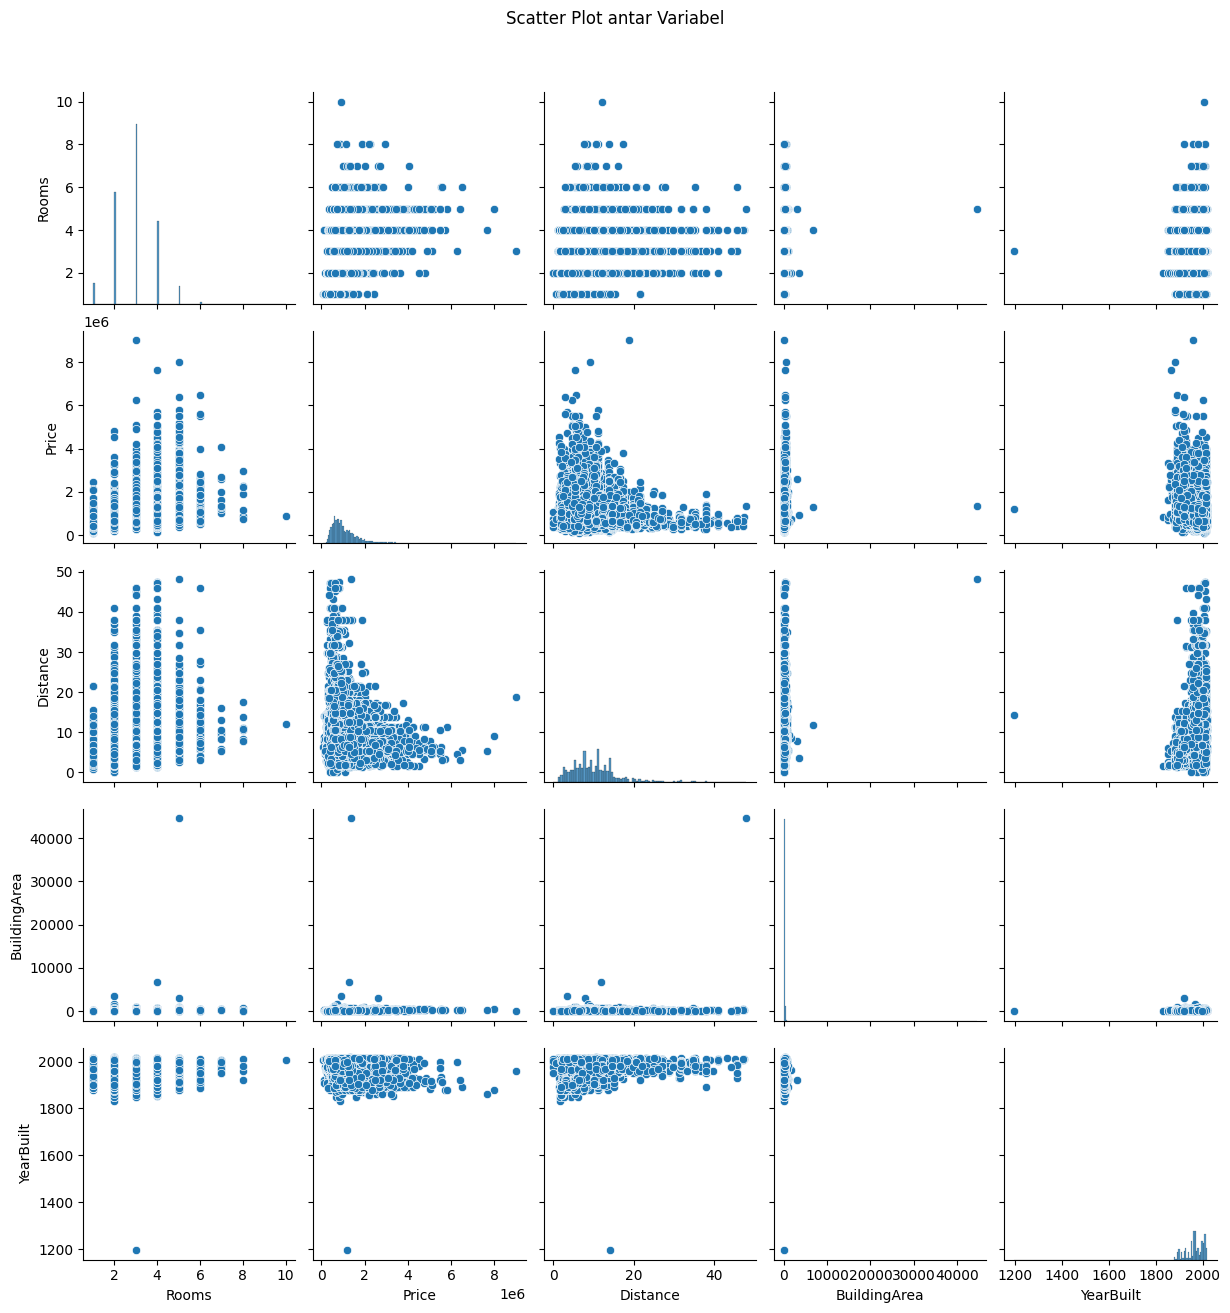

In [ ]:
# scatter plot setiap kombinasi variabel
cols = ['Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt']

sns.pairplot(df[cols])
plt.suptitle('Scatter Plot antar Variabel', y=1.05)
plt.show()


In [ ]:
# pearson correlation
corr = df[cols].corr()
corr

,Rooms,Price,Distance,BuildingArea,YearBuilt
Rooms,1.000000,0.496634,0.294203,0.124127,-0.065413
Price,0.496634,1.000000,-0.162522,0.090981,-0.323617
Distance,0.294203,-0.162522,1.000000,0.099481,0.246379
BuildingArea,0.124127,0.090981,0.099481,1.000000,0.019665
YearBuilt,-0.065413,-0.323617,0.246379,0.019665,1.000000


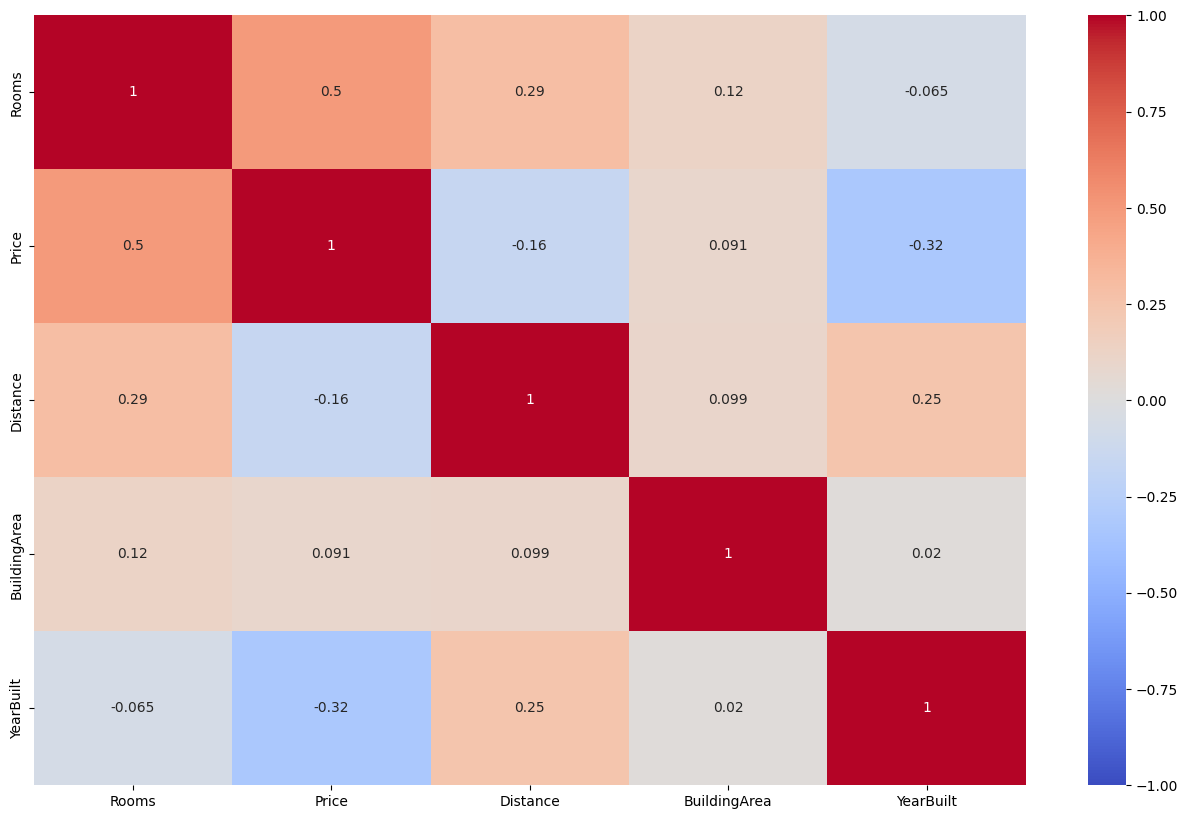

In [ ]:
# heatmap setiap variabel
plt.figure(figsize=(16,10))
sns.heatmap(corr,
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True)
plt.show()

# 'Price' dengan 'Room' merupakan dua variabel dengan korelasi kuat sebesar 0.5 (moderate)

# **No.5**

Tampilkan visualisasi yang menggambarkan korelasi antara variabel BuildingArea dan Price! Sebelum divisualisasikan, hapus dahulu (sementara) rumah dengan Building Area yang lebih dari 2000 m2 (karena dianggap sebagai outlier)!

<Axes: xlabel='BuildingArea'>

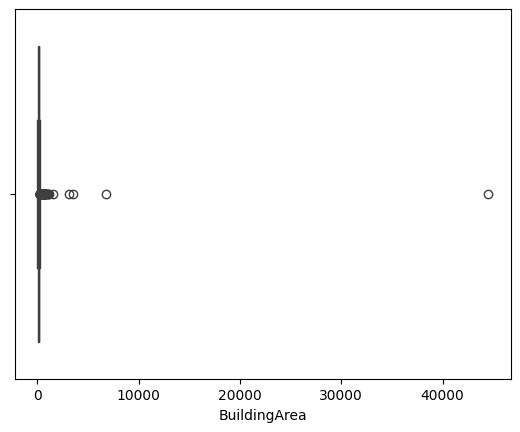

In [50]:
# distribusi data 'BuildingArea'
sns.boxplot(data=df,
            x='BuildingArea')

In [53]:
# filter building area > 2000
df_filtered = df.query("BuildingArea <= 2000")
df_filtered

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [57]:
corr = df_filtered[["BuildingArea", "Price"]].corr()
corr

,BuildingArea,Price
BuildingArea,1.000000,0.525492
Price,0.525492,1.000000


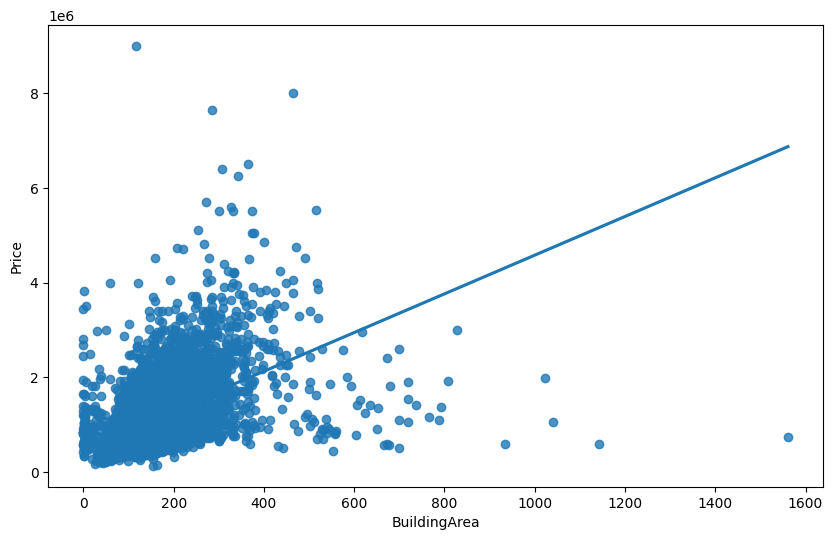

In [67]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_filtered,
            x="BuildingArea",
            y="Price",
            ci=None)
plt.show()

# **No.6**

Dari visualisasi nomor sebelumnya, tambahkan variabel Type (tipe rumah) ke dalam visualisasi sehingga korelasi antara luas bangunan (Buliding Area) dan harga rumah (Price) juga dapat diobservasi berdasarkan tipenya (Type)!

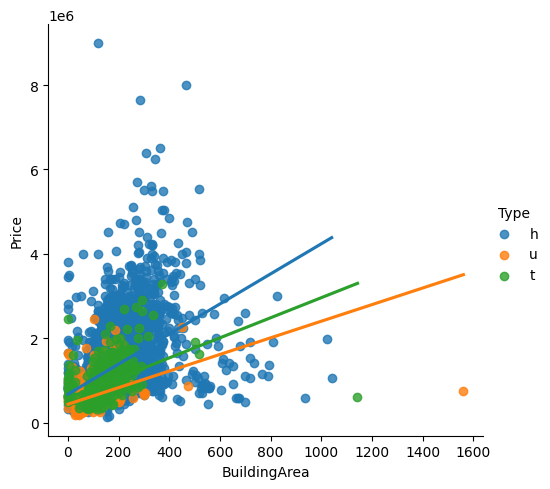

In [80]:
# menggunakan.implot() untuk menampilkan hubungan linear >2 variabel numerik
sns.lmplot(data=df_filtered,
            x="BuildingArea",
            y="Price",
            hue="Type",
            ci=None)
plt.show()

# **No.7**

Tampilkan visualisasi yang menggambarkan perubahan jumlah rumah yang dijual dari Jan 2016 - Des 2017!

In [20]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [139]:
monthly_sales = df.groupby("YearMonth").size().reset_index()
monthly_sales.columns = ["YearMonth", "JumlahPenjualan"]

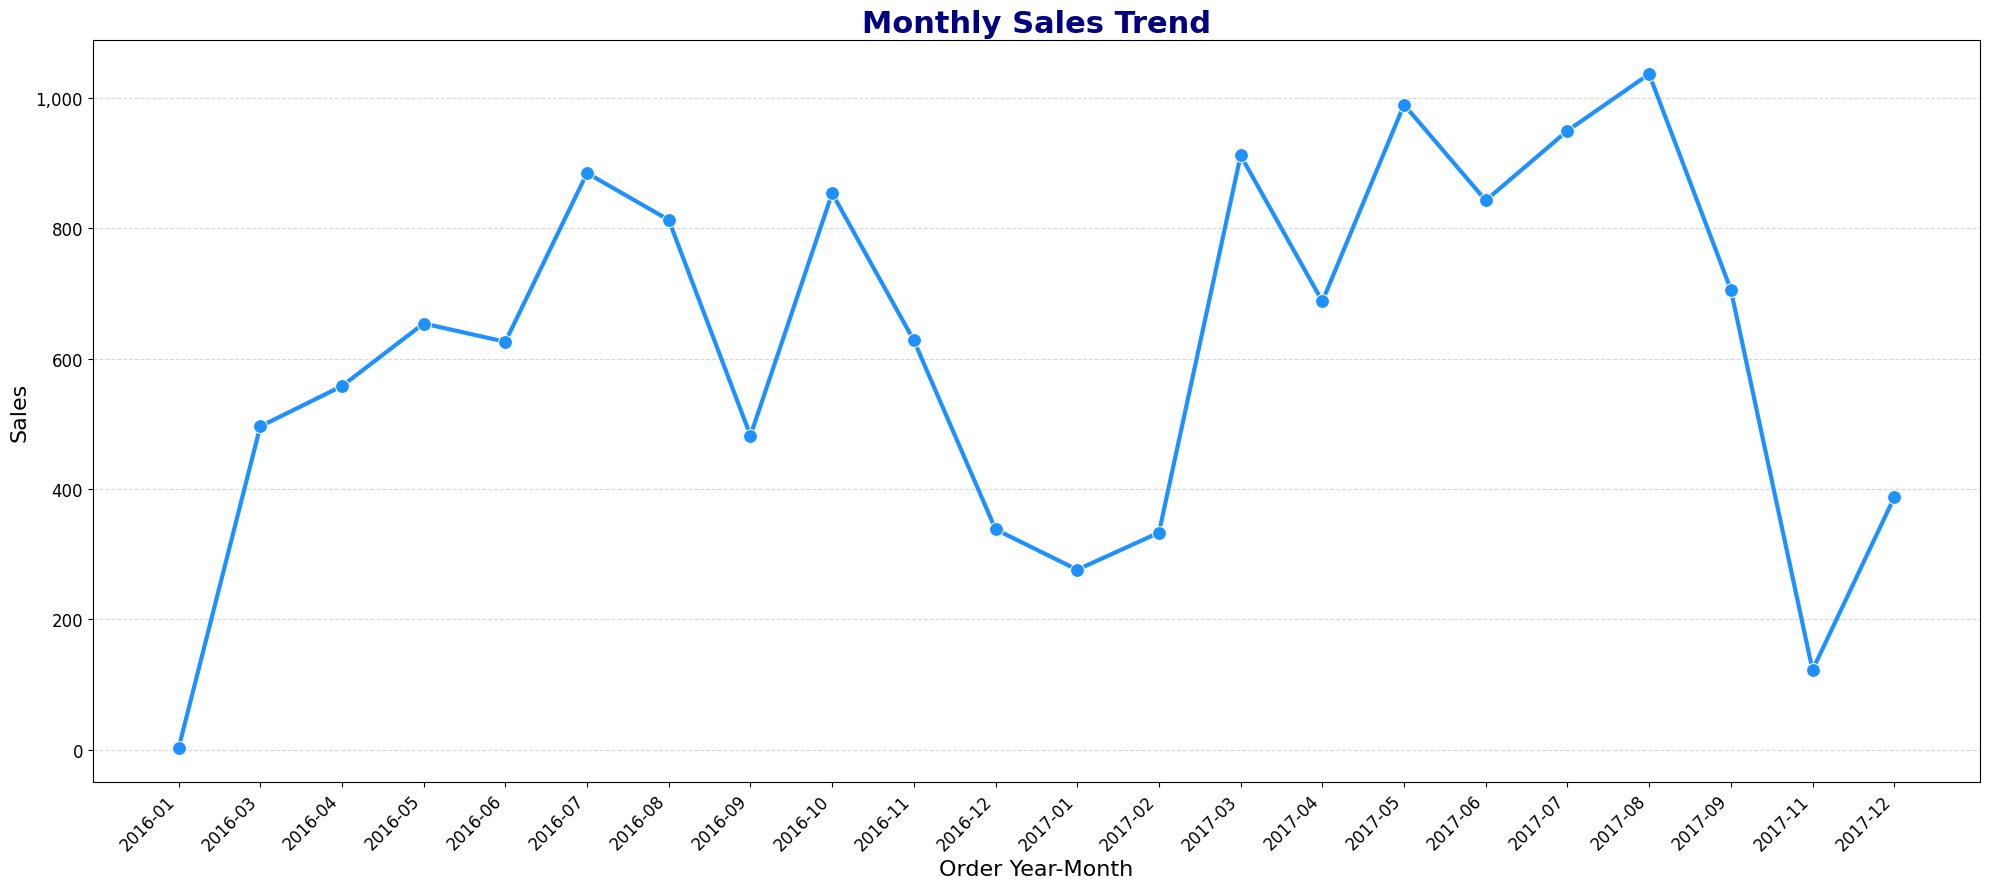

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(20, 9))

# Use a cool color (e.g., 'dodgerblue')
sns.lineplot(
    data=monthly_sales,
    x="YearMonth",
    y="JumlahPenjualan",
    marker="o",
    color="dodgerblue",
    linewidth=3,
    markersize=10
)

plt.title("Monthly Sales Trend", fontsize=22, fontweight='bold', color='navy')
plt.xlabel("Order Year-Month", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

# **No.8**

- Gunakan `results.csv` dari https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017/data

In [83]:
results = pd.read_csv(r'D:\0. JCDS\Dataset\International football results\results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True
48362,2025-06-29,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False
48363,2025-07-02,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False
48364,2025-07-02,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True


In [84]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48366 entries, 0 to 48365
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48366 non-null  object
 1   home_team   48366 non-null  object
 2   away_team   48366 non-null  object
 3   home_score  48366 non-null  int64 
 4   away_score  48366 non-null  int64 
 5   tournament  48366 non-null  object
 6   city        48366 non-null  object
 7   country     48366 non-null  object
 8   neutral     48366 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


- Ubah tipe kolom `date` jadi `datetime` dengan menggunakan `pd.to_datetime` (timpa variabel aslinya)

In [85]:
results["date"]= pd.to_datetime(results["date"])
results["date"]

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
48361   2025-06-29
48362   2025-06-29
48363   2025-07-02
48364   2025-07-02
48365   2025-07-06
Name: date, Length: 48366, dtype: datetime64[ns]

* Buat kolom `year` yang lokasinya setelah kolom `date`

In [86]:
results.insert(1, 'year', results['date'].dt.year)

In [87]:
results

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,1873,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,1875,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,2025,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True
48362,2025-06-29,2025,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False
48363,2025-07-02,2025,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False
48364,2025-07-02,2025,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True


- Timpa variabel `results` dengan data pertandingan yang tahunnya >= 1990 saja.

In [88]:
results =  results[results['year'] >= 1990]
results

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral
17113,1990-01-12,1990,Algeria,Mali,5,0,Friendly,Paris,France,True
17114,1990-01-14,1990,Algeria,Cameroon,3,1,Friendly,Paris,France,True
17115,1990-01-17,1990,Greece,Belgium,2,0,Friendly,Athens,Greece,False
17116,1990-01-17,1990,Mexico,Argentina,2,0,Friendly,Los Angeles,United States,True
17117,1990-01-20,1990,Malawi,Tanzania,2,2,Friendly,Lobamba,Swaziland,True
...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,2025,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True
48362,2025-06-29,2025,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False
48363,2025-07-02,2025,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False
48364,2025-07-02,2025,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True


- Buat kolom baru bernama `home_win`: `home_score` > `away_score`, maka nilai `home_win` adalah `True`, selain itu `False`.

- Buat kolom baru bernama `away_win`: `home_score` < `away_score`, maka nilai `away_win` adalah `True`, selain itu `False`.

In [89]:
results['home_win'] = results['home_score'] > results['away_score']
results['away_win'] = results['home_score'] < results['away_score']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\1053839265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['home_win'] = results['home_score'] > results['away_score']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\1053839265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['away_win'] = results['home_score'] < results['away_score']


In [90]:
results

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
17113,1990-01-12,1990,Algeria,Mali,5,0,Friendly,Paris,France,True,True,False
17114,1990-01-14,1990,Algeria,Cameroon,3,1,Friendly,Paris,France,True,True,False
17115,1990-01-17,1990,Greece,Belgium,2,0,Friendly,Athens,Greece,False,True,False
17116,1990-01-17,1990,Mexico,Argentina,2,0,Friendly,Los Angeles,United States,True,True,False
17117,1990-01-20,1990,Malawi,Tanzania,2,2,Friendly,Lobamba,Swaziland,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,2025,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True,False,False
48362,2025-06-29,2025,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False,False,False
48363,2025-07-02,2025,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False,True,False
48364,2025-07-02,2025,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True,True,False


- Buat variabel baru bernama `home_indo` yang isinya adalah pertandingan yang `home_team`-nya Indonesia saja.

- Buat variabel baru bernama `away_indo` yang isinya adalah pertandingan yang `away_team`-nya Indonesia saja.

In [91]:
home_indo = results[results['home_team'] == 'Indonesia']
away_indo = results[results['away_team'] == 'Indonesia']
results

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win
17113,1990-01-12,1990,Algeria,Mali,5,0,Friendly,Paris,France,True,True,False
17114,1990-01-14,1990,Algeria,Cameroon,3,1,Friendly,Paris,France,True,True,False
17115,1990-01-17,1990,Greece,Belgium,2,0,Friendly,Athens,Greece,False,True,False
17116,1990-01-17,1990,Mexico,Argentina,2,0,Friendly,Los Angeles,United States,True,True,False
17117,1990-01-20,1990,Malawi,Tanzania,2,2,Friendly,Lobamba,Swaziland,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,2025,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True,False,False
48362,2025-06-29,2025,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False,False,False
48363,2025-07-02,2025,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False,True,False
48364,2025-07-02,2025,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True,True,False


Buat kolom baru pada DataFrame `home_indo`:
- `indo_win` -> dari `home_win`

- `opponent` -> dari `away_team`

- `home` -> `True` semua

In [98]:
home_indo["indo_win"] = home_indo["home_win"]
home_indo['opponent'] = home_indo['away_team']
home_indo['home'] = True

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\2432238570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_indo["indo_win"] = home_indo["home_win"]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\2432238570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_indo['opponent'] = home_indo['away_team']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\2432238570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [99]:
home_indo

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,indo_win,opponent,home
17133,1990-02-02,1990,Indonesia,Kenya,2,3,King's Cup,Bangkok,Thailand,True,False,True,False,Kenya,True
17400,1990-08-18,1990,Indonesia,Singapore,6,0,Friendly,Jakarta,Indonesia,False,True,False,True,Singapore,True
17419,1990-08-25,1990,Indonesia,Australia,0,3,Friendly,Jakarta,Indonesia,False,False,True,False,Australia,True
17793,1991-06-07,1991,Indonesia,Malta,0,3,Korea Cup,Seoul,South Korea,True,False,True,False,Malta,True
18047,1991-11-26,1991,Indonesia,Malaysia,2,0,Southeast Asian Games,Manila,Philippines,True,True,False,True,Malaysia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47942,2024-11-19,2024,Indonesia,Saudi Arabia,2,0,FIFA World Cup qualification,Jakarta,Indonesia,False,True,False,True,Saudi Arabia,True
47953,2024-12-12,2024,Indonesia,Laos,3,3,ASEAN Championship,Surakarta,Indonesia,False,False,False,False,Laos,True
47968,2024-12-21,2024,Indonesia,Philippines,0,1,ASEAN Championship,Surakarta,Indonesia,False,False,True,False,Philippines,True
48166,2025-03-25,2025,Indonesia,Bahrain,1,0,FIFA World Cup qualification,Jakarta,Indonesia,False,True,False,True,Bahrain,True


Buat kolom baru pada DataFrame `away_indo`:
- `indo_win` -> dari `away_win`

- `opponent` -> dari `home_team`

- `home` -> `False` semua

In [100]:
away_indo["indo_win"] = away_indo["away_win"]
away_indo['opponent'] = away_indo['home_team']
away_indo['home'] = False

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\1801689321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_indo["indo_win"] = away_indo["away_win"]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\1801689321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_indo['opponent'] = away_indo['home_team']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\1801689321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [101]:
away_indo

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,indo_win,opponent,home
17141,1990-02-05,1990,Thailand,Indonesia,1,1,King's Cup,Bangkok,Thailand,False,False,False,False,Thailand,False
17620,1991-02-06,1991,Malaysia,Indonesia,1,2,Merdeka Tournament,Kuala Lumpur,Malaysia,False,False,True,True,Malaysia,False
17798,1991-06-09,1991,South Korea,Indonesia,3,0,Korea Cup,Daejeon,South Korea,False,True,False,False,South Korea,False
17799,1991-06-11,1991,Egypt,Indonesia,6,0,Korea Cup,Seoul,South Korea,True,True,False,False,Egypt,False
17988,1991-10-05,1991,Singapore,Indonesia,2,0,Friendly,Singapore,Singapore,False,True,False,False,Singapore,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47801,2024-10-15,2024,China PR,Indonesia,2,1,FIFA World Cup qualification,Qingdao,China PR,False,True,False,False,China PR,False
47947,2024-12-09,2024,Myanmar,Indonesia,0,1,ASEAN Championship,Yangon,Myanmar,False,False,True,True,Myanmar,False
47959,2024-12-15,2024,Vietnam,Indonesia,1,0,ASEAN Championship,Việt Trì,Vietnam,False,True,False,False,Vietnam,False
48042,2025-03-20,2025,Australia,Indonesia,5,1,FIFA World Cup qualification,Sydney,Australia,False,True,False,False,Australia,False


- Buat variabel baru bernama `indo_matches` dengan menggabungkan DataFrame `home_indo` dan `away_indo` secara vertikal

In [103]:
indo_matches = pd.concat([home_indo, away_indo])
indo_matches

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,indo_win,opponent,home
17133,1990-02-02,1990,Indonesia,Kenya,2,3,King's Cup,Bangkok,Thailand,True,False,True,False,Kenya,True
17400,1990-08-18,1990,Indonesia,Singapore,6,0,Friendly,Jakarta,Indonesia,False,True,False,True,Singapore,True
17419,1990-08-25,1990,Indonesia,Australia,0,3,Friendly,Jakarta,Indonesia,False,False,True,False,Australia,True
17793,1991-06-07,1991,Indonesia,Malta,0,3,Korea Cup,Seoul,South Korea,True,False,True,False,Malta,True
18047,1991-11-26,1991,Indonesia,Malaysia,2,0,Southeast Asian Games,Manila,Philippines,True,True,False,True,Malaysia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47801,2024-10-15,2024,China PR,Indonesia,2,1,FIFA World Cup qualification,Qingdao,China PR,False,True,False,False,China PR,False
47947,2024-12-09,2024,Myanmar,Indonesia,0,1,ASEAN Championship,Yangon,Myanmar,False,False,True,True,Myanmar,False
47959,2024-12-15,2024,Vietnam,Indonesia,1,0,ASEAN Championship,Việt Trì,Vietnam,False,True,False,False,Vietnam,False
48042,2025-03-20,2025,Australia,Indonesia,5,1,FIFA World Cup qualification,Sydney,Australia,False,True,False,False,Australia,False


- Simpan `indo_matches` sebagai `indo_matches.csv`

In [104]:
indo_matches.to_csv("indo_matches.csv")

- Kolom `indo_win` dan `home` bisa dianggap sebagai variabel kategori yang nilainya `True` atau `False`. Hubungan kategori-kategori dapat di-visualisasi melalui visualisasi proporsi atau jumlahnya dari bar plot.

- Buat visualisasi bar plot jumlah/proporsi variabel `indo_win` dan `home` dengan:
    - `countplot` dari `seaborn`

    - stacked bar plot (**hint**: buat tabel jumlahnya dengan `pd.crosstab` terlebih dahulu)

- Tulis insight yang anda peroleh dari grafik.

1. Countplot

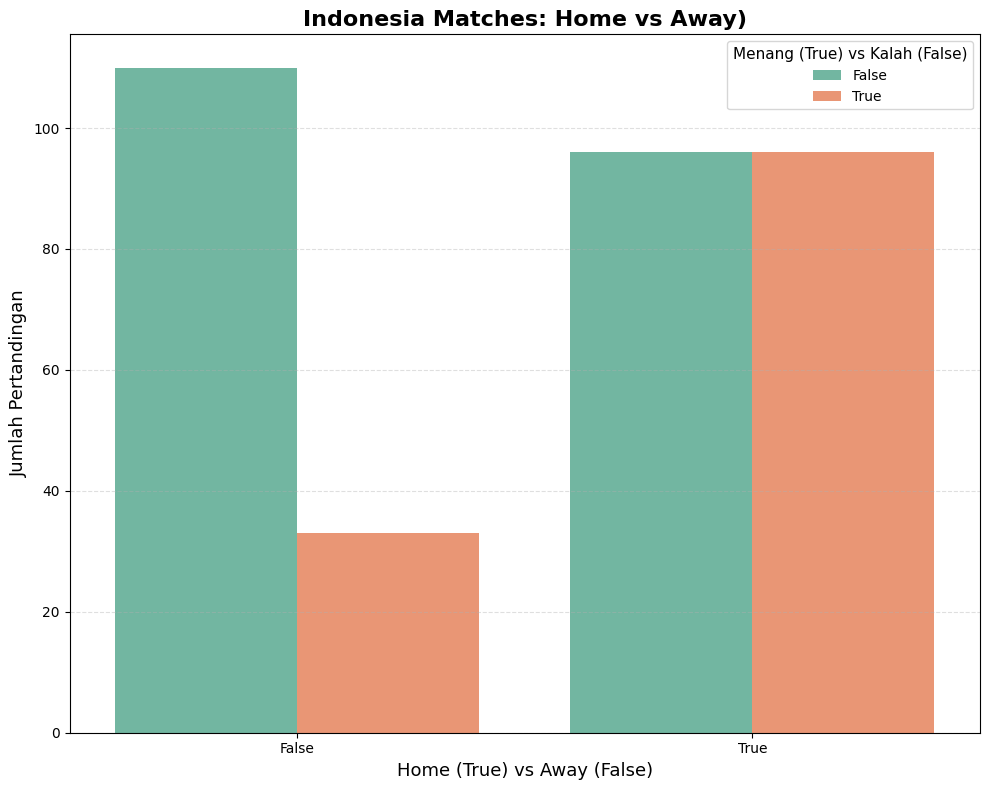

In [115]:
plt.figure(figsize=(10, 8))
sns.countplot(data=indo_matches,
              x="home",         
              hue="indo_win",  
              palette="Set2")

plt.title("Indonesia Matches: Home vs Away)", fontsize=16, fontweight='bold')
plt.xlabel("Home (True) vs Away (False)", fontsize=13)
plt.ylabel("Jumlah Pertandingan", fontsize=13)
plt.legend(title="Menang (True) vs Kalah (False)", fontsize=10, title_fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

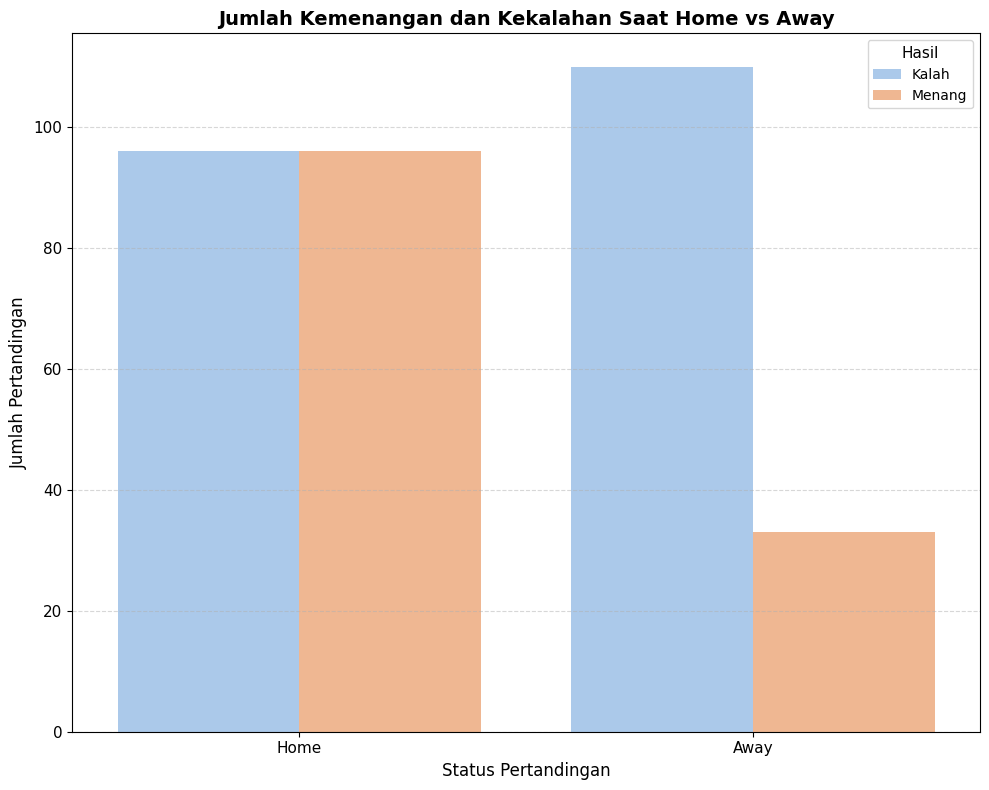

In [ ]:
#Generative AI

import seaborn as sns
import matplotlib.pyplot as plt

# Salin dataframe agar tidak mengubah data asli
df_plot = indo_matches.copy()

# Ubah nilai boolean jadi label string agar grafik lebih jelas
df_plot["Lokasi"] = df_plot["home"].map({True: "Home", False: "Away"})
df_plot["Hasil"] = df_plot["indo_win"].map({True: "Menang", False: "Kalah"})

# Buat plot
plt.figure(figsize=(10, 8))
sns.countplot(data=df_plot,
              x="Lokasi",
              hue="Hasil",
              palette="pastel")

plt.title("Jumlah Kemenangan dan Kekalahan Saat Home vs Away", fontsize=14, fontweight='bold')
plt.xlabel("Status Pertandingan", fontsize=12)
plt.ylabel("Jumlah Pertandingan", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Hasil", fontsize=10, title_fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

2. Stacked bar chart

In [121]:
match_result = pd.crosstab(indo_matches['home'], indo_matches['indo_win'])

In [122]:
match_result

indo_win,False,True
home,,
False,110,33
True,96,96


<Axes: xlabel='home'>

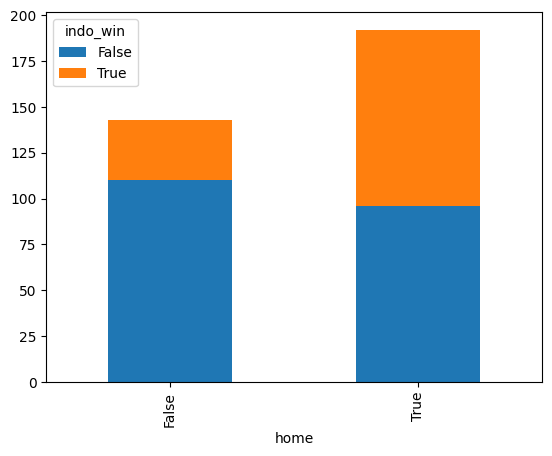

In [118]:
match_result.plot(kind='bar', stacked=True)

**insight**
- dari total 335 pertandingan, pada laga kandang indonesia memiliki jumlah meanng dan kalah yang sama sebanyak 96 kali
- sedangkan pada laga tandang indonesia kalah 100 kali dengan kemenangan 33 kali
- proporsi indonesia 3kali lipat lebih sering kalah di kandang musuh menjadi menarik untuk diketahui apa penyebabnya.

In [123]:
indo_matches.shape[0]

335

# **No.9 (Eksplorasi Data Bebas)**

- Gunakan data `results` atau `indo_matches` dari nomor 8

- Lakukan eksplorasi dari data yang dipilih

- Tulis dalam markdown insight menarik yang anda temui dari data dan tampilkan grafiknya.

In [124]:
indo_matches.head()

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,away_win,indo_win,opponent,home
17133,1990-02-02,1990,Indonesia,Kenya,2,3,King's Cup,Bangkok,Thailand,True,False,True,False,Kenya,True
17400,1990-08-18,1990,Indonesia,Singapore,6,0,Friendly,Jakarta,Indonesia,False,True,False,True,Singapore,True
17419,1990-08-25,1990,Indonesia,Australia,0,3,Friendly,Jakarta,Indonesia,False,False,True,False,Australia,True
17793,1991-06-07,1991,Indonesia,Malta,0,3,Korea Cup,Seoul,South Korea,True,False,True,False,Malta,True
18047,1991-11-26,1991,Indonesia,Malaysia,2,0,Southeast Asian Games,Manila,Philippines,True,True,False,True,Malaysia,True


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7688\1848407843.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=indo_matches,


<Axes: xlabel='year', ylabel='indo_win'>

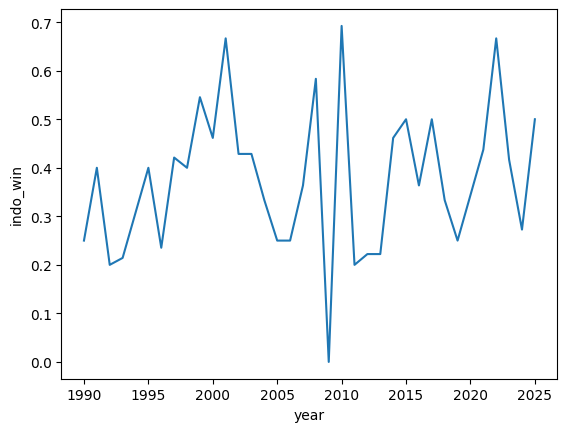

In [127]:
sns.lineplot(data=indo_matches,
             x="year",
             y="indo_win",
             ci=None)

In [ ]:
# winrate 35 tahun terakhir
indo_matches["indo_win"].mean()

np.float64(0.3850746268656716)

**insight 1.**

selama 35 tahun indonesia mengalami flukstuasi kemangan yang sangat signifikan dengan winrate sektar 38% saja

In [130]:
pd.crosstab(indo_matches["tournament"], indo_matches["indo_win"])

indo_win,False,True
tournament,,
AFC Asian Cup,13,3
AFC Asian Cup qualification,20,12
AFF Championship,38,37
ASEAN Championship,3,1
Dunhill Cup,2,1
FIFA World Cup qualification,45,17
Friendly,64,43
King's Cup,2,0
Korea Cup,3,0


<Axes: xlabel='count', ylabel='tournament'>

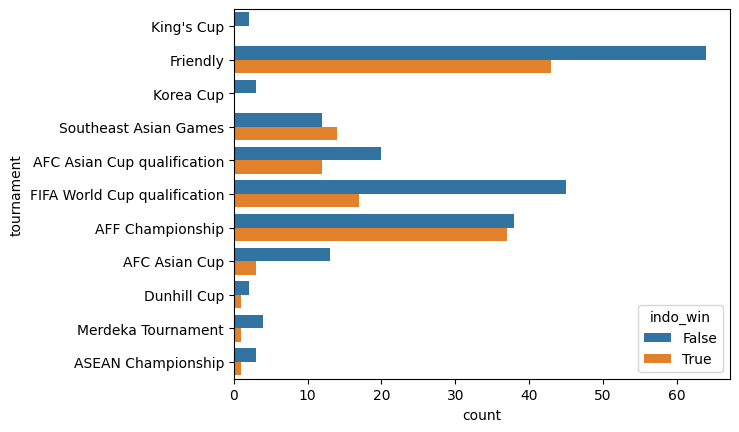

In [137]:
sns.countplot(data=indo_matches,
            y="tournament",
            hue="indo_win")

**insight 2**
- jumlah friednly match terbanyak dan indonesia sering menang, namun jumlah kekalahan sangat banyak melebihi jumlah kemanangan
- presentasi terbesar indonesia menang adalah pada SE asian games sekitar 54%
- indonesia belum pernah menang sama sekali pada korea cup maupun kings cup